**DATA ANALYSIS CASE STUDIES**:

You’ve been provided with a few csv files. Kindly, go through them and perform analysis
on the same. You’re free to use whichever data analysis tool you’re comfortable with(few
ex: MS Excel, Python, Tableau etc.)

**1. Students Adaptability to Online Learning:**

● Examine how well students adapt to the online environment in terms of their
ability to persist and earn strong grades in online courses relative to their ability to
do so in face-to-face courses.

● Government vs Non-Government Institutions which among the two of them have
offered a smooth transition from traditional mode of education to online mode?

● Do you think location and load shedding plays an important role in a student's
adaptability to an online learning environment ? How so, provide concrete
examples.

● Visualize the data distribution for each variable.

● Build a hypothesis for comparative analysis. Show which hypothesis is suited
best for the particular dataset.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/students_adaptability - students_adaptability.csv')

In [3]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,03-Jun,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,01-Mar,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,01-Mar,No,Mobile,Moderate
3,Girl,Nov-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,01-Mar,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [5]:
df.shape

(1205, 14)

In [6]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [7]:
df.describe().T

,count,unique,top,freq
Gender,1205,2,Boy,663
Age,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


**Question 1.** Examine how well students adapt to the online environment in terms of their ability to persist and earn strong grades in online courses relative to their ability to do so in face-to-face courses.

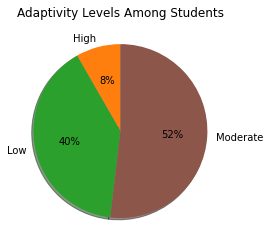

In [8]:
## Pie Chart visualization to understand the Adaptivity level of students
cmap = plt.get_cmap("tab10")
colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
X= df.groupby(['Adaptivity Level'])['Adaptivity Level'].count().to_frame()
plt.pie(X['Adaptivity Level'],colors= colors,labels = X.index,startangle = 90, autopct = "%1.0f%%", explode = None, shadow = True)
plt.title("Adaptivity Levels Among Students")
plt.show()

**Ans**: The data shows that only 8% of students adapted highly to online education and 52% of students moderate and 40% of students Low.


**Question 2** : Government vs Non-Government Institutions which among the two of them have offered a smooth transition from traditional mode of education to online mode?

In [9]:
def Education_level(df,x,y):
    category = df.groupby([x,y])[y].count().to_frame()
    return category
output =  Education_level(df,'Institution Type', 'Adaptivity Level')  
print(output)

                                   Adaptivity Level
Institution Type Adaptivity Level                  
Government       High                            20
                 Low                            234
                 Moderate                       128
Non Government   High                            80
                 Low                            246
                 Moderate                       497


Text(0.5, 1.0, 'Government vs Non-Government Institutions Adaptive level ')

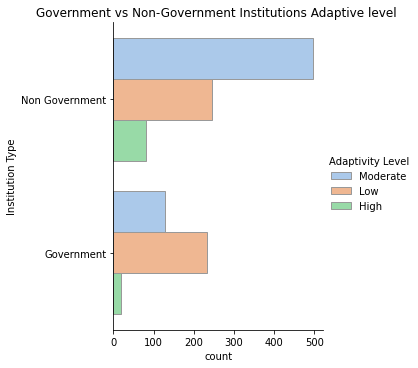

In [10]:
sns.catplot(y="Institution Type", hue="Adaptivity Level", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
plt.title('Government vs Non-Government Institutions Adaptive level ')

**Ans** can see that the highest frequency of high adaptivity in non-government is 9.7% and moderate in non-government 60.3% and low in non-government 29.8%, and the highest frequency of high adaptivity in government is 5.2% and moderate in government 33.5% and low in government 61.2%. Among the non-government, moderate has the highest frequency level of adaptivity and government low has the highest frequency level of adaptivity. As a function has been created to group each characteristic, it is easy to represent each column in these tables using this function. 










**Question 3:** Do you think location and load shedding plays an important role in a student's adaptability to an online learning environment ? How so, provide concrete examples.

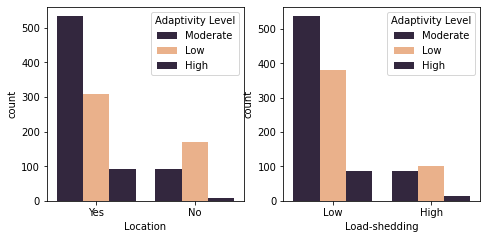

In [11]:
X = df[['Location', 'Load-shedding','Adaptivity Level']]
plt.figure(figsize = (12,25))
i=1
for k in [col for col in X.columns if col!='Adaptivity Level']:
    plt.subplot(6,3,i)
    sns.countplot(x = k , hue = 'Adaptivity Level', data = X, palette=['#332342',"#FAAE7B"])
    i +=1    

**Location**: this variable determines whether students live in towns or in rural areas.The results showed that students in urban areas adapted better than those in rural areas. We can infer access to facilities, basic amenities, and better internet connectivity as reasons for this.

**Load shedding**: this tests the level of load shedding of electricity, which in this case is inversely proportional to the availability of power supply. Students with poor supply tended to adapt at lower levels than their counterparts with low shedding and consequently better electricity power supply.

**Question 4**: Visualize the data distribution for each variable.

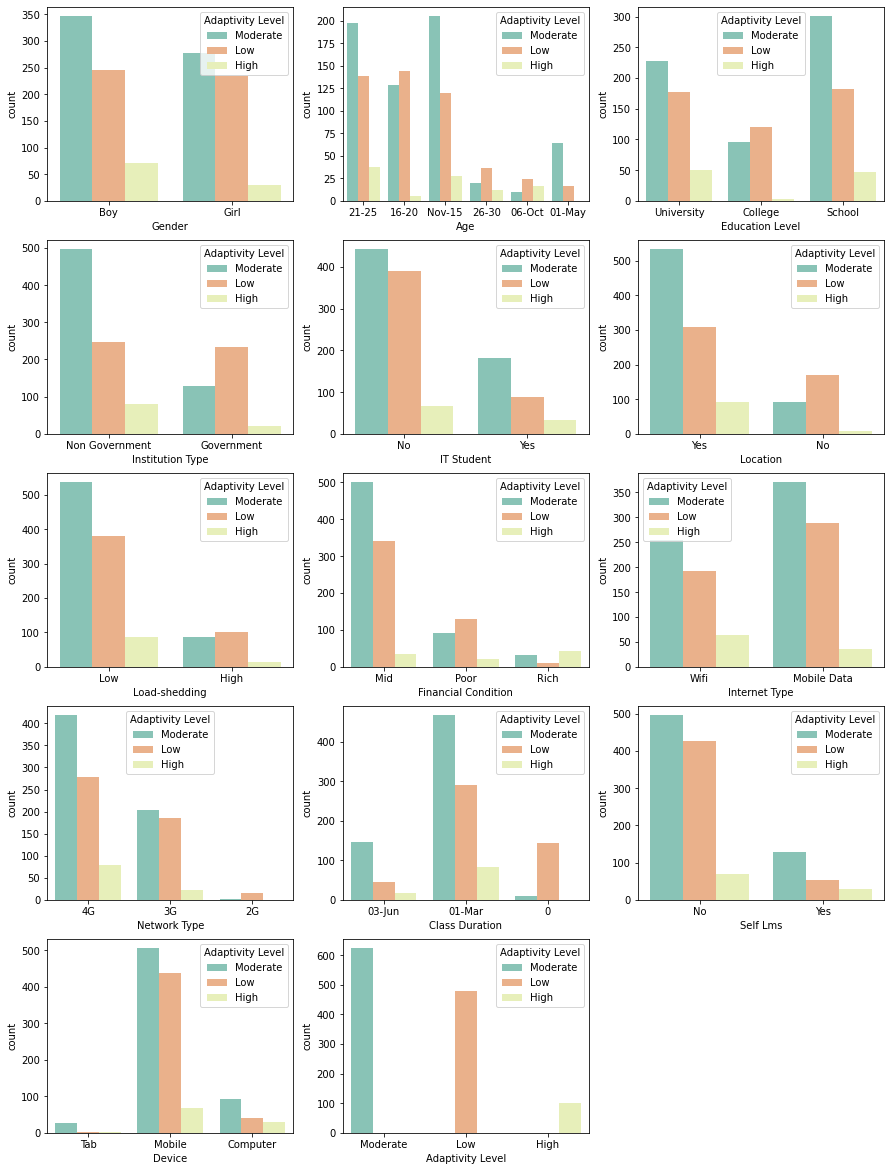

In [12]:
plt.figure(figsize = (15,25))
i = 1
for x in df:
    plt.subplot(6,3,i)
    sns.countplot(x = x , hue='Adaptivity Level', data = df,  palette=["#7fcdbb","#FAAE7B","#edf8b1"])
    i +=1

**Important things to point out in this visualisation are:**

**Age Range**: The stark differences in adaptivity by age range are very interesting. Respondents between ages 1–5 did not achieve high adaptivity at all. High adaptivity is recorded mostly among 11–15 year olds and 21–25 year olds, typically in junior high schools and tertiary institutions.

**Location**: this variable determines whether students live in towns or in rural areas.The results showed that students in urban areas adapted better than those in rural areas. We can infer access to facilities, basic amenities, and better internet connectivity as reasons for this.

**Load shedding**: this tests the level of load shedding of electricity, which in this case is inversely proportional to the availability of power supply. Students with poor supply tended to adapt at lower levels than their counterparts with low shedding and consequently better electricity power supply.

Students who used WiFi had higher frequencies of high-level adaptivity than those who used mobile networks. As most Wi-Fi networks make use of high-speed internet connectivity, we can infer that the better internet connectivity led to a better ability to concentrate during classes.

**Self LMS**: This variable refers to the availability of the educational institution's Learning Management System (LMS). Although a smaller portion of the sample size were exposed to LMS, they had higher rates of high adaptivity to online education.Interestingly, the level of low adaptivity is also relatively minute compared to those who weren't using the LMS.

**Question 5**: Build a hypothesis for comparative analysis. Show which hypothesis is suited best for the particular dataset.



In [13]:
from scipy.stats import chi2_contingency 
import numpy as np
chi_sqt = pd.crosstab(df.Gender, df['Adaptivity Level'], margins=True)
value = np.array([chi_sqt.iloc[0][0:5].values,
                  chi_sqt.iloc[1][0:5].values])

print(chi_sqt)
print('\n')
print(chi2_contingency(value)[0:3])

Adaptivity Level  High  Low  Moderate   All
Gender                                     
Boy                 71  245       347   663
Girl                29  235       278   542
All                100  480       625  1205


(13.451358056255899, 0.0037555621980203415, 3)


**Result** From above, 0.003 is the p-value, 13.45 is the statistical value and 3 is the degree of freedom. As the p-value is greater than 0.05, we accept the NULL hypothesis and assume that the variables Gender and Adaptivity Level are independent of each other.

In [14]:
print(chi2_contingency(value))

(13.451358056255899, 0.0037555621980203415, 3, array([[ 55.02074689, 264.09958506, 343.87966805, 663.        ],
       [ 44.97925311, 215.90041494, 281.12033195, 542.        ]]))
